#### Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### Import the dependencies

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#### data collection and analysis

In [7]:
data=pd.read_csv(r"C:\Users\Shashi Shekhar\Desktop\python\Dataset for resume projects\insurance.csv ")
data.shape

(1338, 7)

In [10]:
#first 5 rows of dataset/dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#last 5 rows of dataset/dataframe
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
# getting information of dataset/dataframe as
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


from above analysis we get categorical columns are:
    
    1. sex
    2. smoker
    3. region

In [13]:
# checking null values of dataset/dataframe
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
#checking the distribution categorical columns as:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [18]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

#### data analysis

In [20]:
#statistical figure of dataset/dataframe as
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### distribution graph of regressional column

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14232\3968882135.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


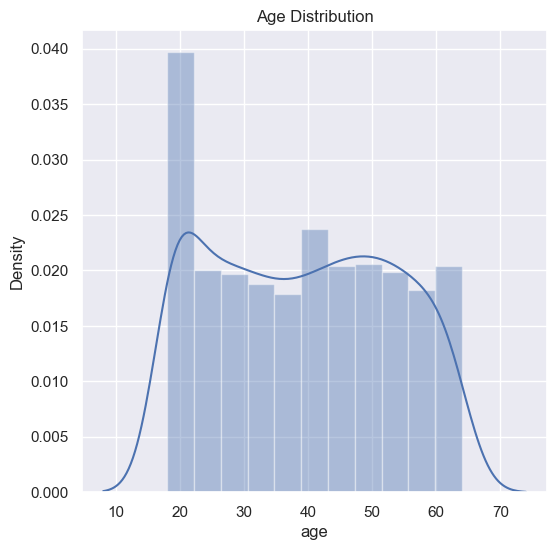

In [22]:
#distribution graph of "age"
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()


analysis: as per statistical output

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14232\471815974.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


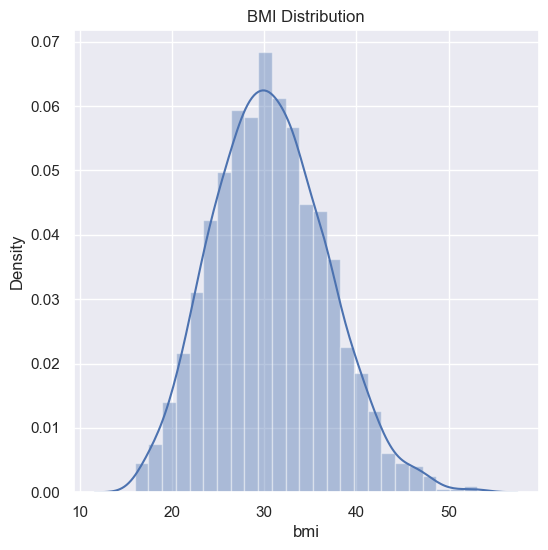

In [24]:
#distribution graph of bmi
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

analysis: as per statistical output

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14232\2720414478.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['children'])
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


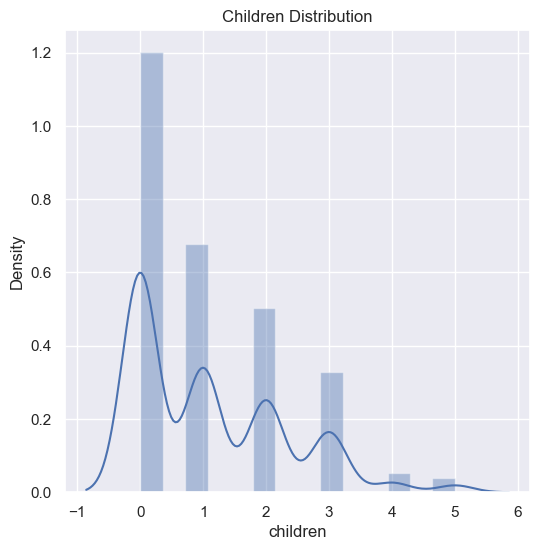

In [25]:
#distribution graph of 'children'
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['children'])
plt.title("Children Distribution")
plt.show()

analysis: as per statistical output

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14232\3279951945.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges']);
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


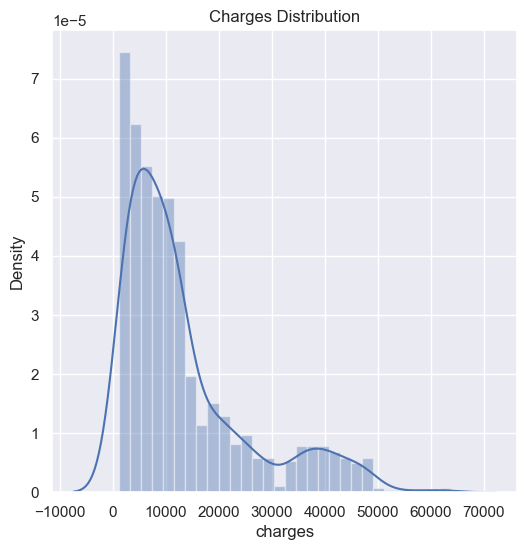

In [27]:
#distribution graph of charges
sns.set()
plt.figure(figsize=(6,6))
plt.title('Charges Distribution')
sns.distplot(data['charges']);

analysis: as per statistical output

#### count plot of categorical column

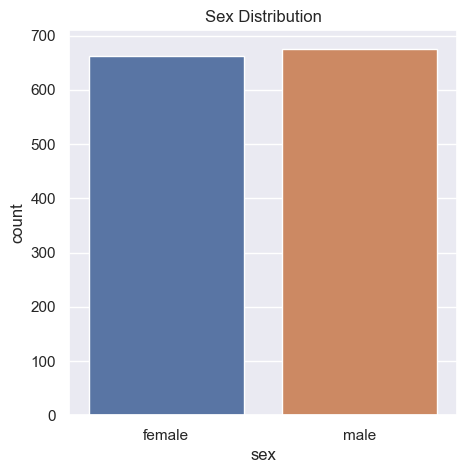

In [28]:
#count plot of 'sex'
plt.figure(figsize=(5,5))
plt.title("Sex Distribution")
sns.countplot(x='sex', data=data);

analysis: male has more distribution than female

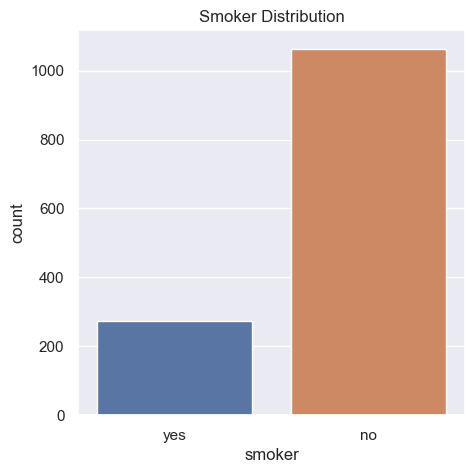

In [30]:
#count plot of 'smoker'
plt.figure(figsize=(5,5))
plt.title('Smoker Distribution')
sns.countplot(x='smoker', data=data);

analysis: no-smoker has more distribution than smoker

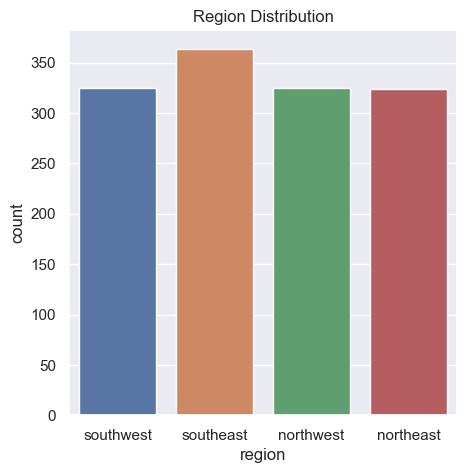

In [32]:
#count plot of 'region'
plt.figure(figsize=(5,5))
plt.title('Region Distribution')
sns.countplot(x='region', data=data);

Analysis: southeast has maximum distribution among all 4

#### Data Pre-processing

In [47]:
#encoding the categorical features
data.replace({"sex":{"female": 0, "male":1}}, inplace = True)
data.replace({"smoker":{"no": 0, "yes":1}}, inplace = True)
data.replace({"region":{"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}}, inplace=True)

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14232\806879139.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"region":{"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}}, inplace=True)


#### spliting the dataset/dataframe into features and target

In [48]:
#spliting into X=features and Y=target
X=data.drop(['charges'], axis=1)
Y=data['charges']

#### train_test_split data 

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


#### model training using LinearRegression model

In [50]:
#loading the linear model regression
model=LinearRegression()
#fit the model on training data
model.fit(X_train, Y_train)

LinearRegression()

#### model evalution

In [51]:
#prediction of training data as
train_data_prediction=model.predict(X_train)

In [52]:
#R squared value
r2_train=metrics.r2_score(Y_train, train_data_prediction)
print("R squared error:", r2_train)

R squared error: 0.7519923667088932


In [53]:
#prediction of test data as
test_data_prediction=model.predict(X_test)

In [54]:
#R squared value
r2_test=metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", r2_test)

R squared error: 0.7445422986536502


#### building a predictive system

In [56]:
input_data=(18,1,33.77,1,0,1)
# changing input data to numpy array
input_data_as_nparray=np.asarray(input_data)
# reshape the array
input_data_reshape=input_data_as_nparray.reshape(1, -1)
#prediction
prediction=model.predict(input_data_reshape)

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
print("The insurance cost in USD:", prediction[0])

The insurance cost in USD: 3853.3168349355983
